# Pymaceuticals Inc.
---

### Analysis

- Based on the tumor volume, it seems that Capomulin and Ramicane treatments are the most promising due to an actual reduction in tumor volume.
- Ketapril and Naftisol have a larger standard deviation than the other treatments which would lead to a broader distribution of results and more outliers.
- Based on the Capomulin treatment data, there is a strong correlation between the weight of the mouse and the average size of the tumor meaning if one increases the other will as well.
- The gender of the mice selected for the experiment were balanced at 51% male and 49% female to avoid bias in the results.

 

In [332]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_complete = pd.merge(study_results,mouse_metadata, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview

study_results_complete.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [333]:
# Checking the number of mice.
study_results_complete["Mouse ID"].nunique()



249

In [334]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=study_results_complete[study_results_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [335]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results_complete.loc[study_results_complete["Mouse ID"]=='g989']



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [336]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean = study_results_complete[study_results_complete["Mouse ID"] != 'g989']


In [337]:
# Checking the number of mice in the clean DataFrame.
study_results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [338]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
per_drug_mean = study_results_clean.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
per_drug_median = study_results_clean.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
per_drug_variance = study_results_clean.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
per_drug_std_dev =study_results_clean.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
per_drug_mean_std_err =  study_results_clean.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary ={
    'Mean Tumor Volume': per_drug_mean,
    'Median Tumor Volume':per_drug_median,
    'Tumor Volume Variance':per_drug_variance,
    'Tumor Volume Std. Dev.':per_drug_std_dev,
    'Tumor Volume Std. Err.':per_drug_mean_std_err

}
drug_summary = pd.DataFrame(summary)
drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [339]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
result = study_results_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
#study_results_clean["Drug Regimen"].unique()
result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice Tested')]

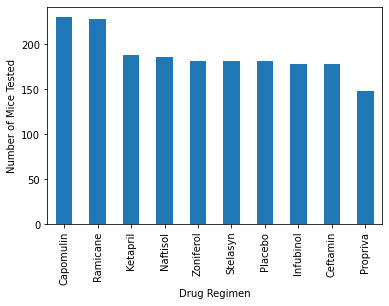

In [340]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda_barplotdf = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

panda_barplot=panda_barplotdf.plot(kind='bar')
panda_barplot.set(ylabel='Number of Mice Tested')







Text(0, 0.5, 'Number of Mice Tested')

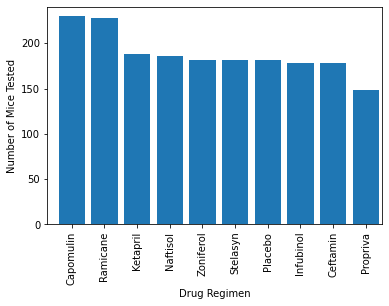

In [341]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_tested = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
drugs= number_tested.index
plt.bar(range(len(drugs)),number_tested)
plt.xlim(-0.75,9.5)
plt.ylim(0, max(number_tested)+10)
plt.xticks(range(len(drugs)),drugs ,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')



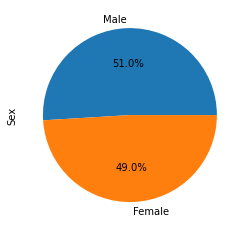

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = study_results_clean['Sex'].value_counts()

panda_pie=gender_count.plot.pie(autopct='%1.1f%%')

panda_pie




Text(0, 0.5, 'Sex')

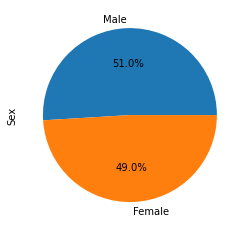

In [343]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = study_results_clean.sort_values(by=['Sex'],ascending=False)['Sex'].unique()

plt.pie(gender_count,labels=pie_labels,autopct='%1.1f%%')
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [344]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


treatment_df = study_results_clean[study_results_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
mouse_group = treatment_df.groupby("Mouse ID")
final_timepoint = mouse_group['Timepoint'].max()
merged_df = pd.merge(treatment_df, final_timepoint.reset_index(), on=['Mouse ID','Timepoint'])
merged_df.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'}, inplace=True)






In [345]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments=merged_df["Drug Regimen"].unique()
   

In [346]:
tumor_volume=[]
capomulin_outliers=[]
ramicane_outliers=[]
infubinol_outliers=[]
ceftamin_outliers=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == drugs, 'Final Tumor Volume (mm3)']

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if drugs == 'Capomulin':
        capomulin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {capomulin_outliers}')
    elif drugs == 'Ramicane':
        ramicane_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {ramicane_outliers}')
    elif drugs=='Infubinol':
        infubinol_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {infubinol_outliers}')
    elif drugs=='Ceftamin':
        ceftamin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {ceftamin_outliers}')

The IQR for Ceftamin is: 15.577752179999997
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
The IQR for Infubinol is: 11.477135160000003
 The outliers are: 4    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
The IQR for Ramicane is: 9.098536719999998
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
The IQR for Capomulin is: 7.781863460000004
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

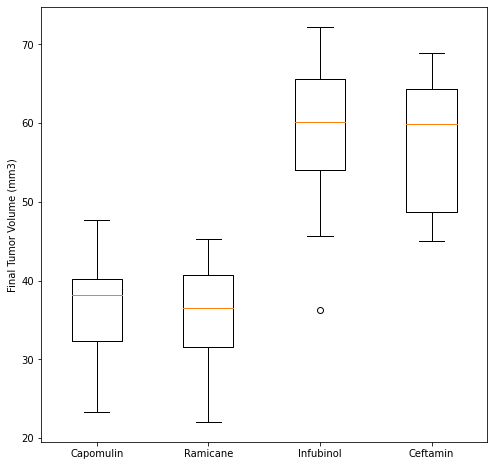

In [347]:
data_capomulin = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume (mm3)']
data_ramicane = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume (mm3)']
data_infubinol = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume (mm3)']
data_ceftamin = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume (mm3)']

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot([data_capomulin, data_ramicane, data_infubinol, data_ceftamin], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

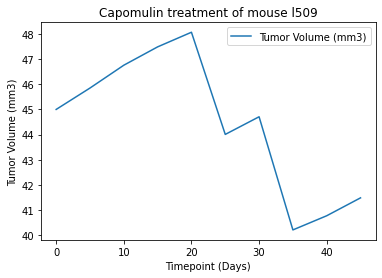

In [351]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_graph = study_results_clean[study_results_clean['Mouse ID'] == 'l509'][['Tumor Volume (mm3)','Timepoint']]

mouse_graph.plot.line(x='Timepoint',y='Tumor Volume (mm3)',title='Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')





Text(0, 0.5, 'Average Tumor Volume (mm3)')

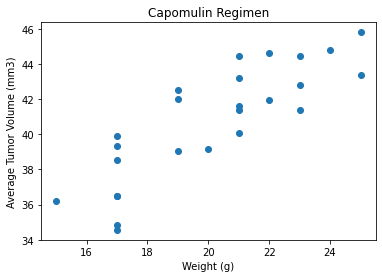

In [349]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df=study_results_clean[study_results_clean['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=study_results_clean[study_results_clean['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(x_values,y_values)
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

The correlation between weight and tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

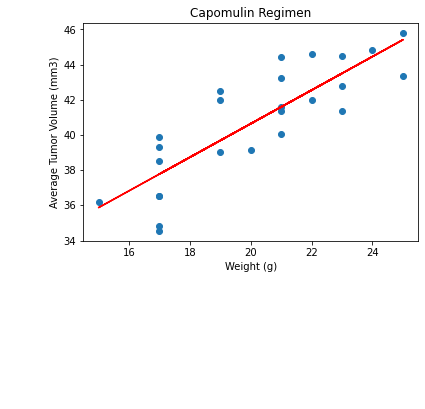

In [350]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

scatter_df=study_results_clean[study_results_clean['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=study_results_clean[study_results_clean['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID').mean()

correlation=st.pearsonr(x_values['Weight (g)'],y_values['Tumor Volume (mm3)'])
print(f'The correlation between weight and tumor volume is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values['Weight (g)'], y_values['Tumor Volume (mm3)'])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.0,25.0),fontsize=15,color="red")
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')